## Training CNN Model ##
#### Using only the heart beat with a moving frequency following HRV ####


### Load the Common Imports ###

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras import Input as Input
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D,Conv1D
from keras.models import Sequential
from keras.layers import Dropout
from keras import layers
from keras.layers import BatchNormalization
import h5py

print(keras.__version__)

2.4.3


# Load Mat Files


In [2]:
f = h5py.File('ML_genTrain_HRV_full_fs500_long_1.mat','r')
arrays = {}

for k, v in f.items():
    arrays[k] = np.array(v)

    
    


In [6]:
print(arrays.keys())
print(datOut.shape)
print(datLabels.shape)

dict_keys(['datOut', 'fhActual', 'frActual', 't'])
(10000, 25001)
(10000, 25001)


### Load the Dataset ###

In [42]:

datOut= arrays['datOut']
datLabels = arrays['fhActual']

tNum = datOut.shape[0]


maxFreq = 1


firstLayerLength = 500 #Length of the Model input, should not matter if data is correct length (1second at fs = 2k)
percentTrain = .9; #What percentange will be used to train (Reamining is test (10% test in this case))

trainEndEx = round(tNum*percentTrain) #Find out what index coresponds to 90% of the training data

x_train = datOut[0:trainEndEx,0:firstLayerLength] #Add training phase data to seperate array
y_train = datLabels[0:trainEndEx] / maxFreq #Add training labels to vector

x_test = datOut[trainEndEx+1:,] #Add testing phase data to array
y_test = datLabels[trainEndEx+1:]/maxFreq #Add testting labels to vector





# convert the data to the right type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


print('x_test shape: ',x_test.shape)
print('x_train shape: ',x_train.shape)

print('y_test shape: ',y_test.shape)
print('y_train shape: ',y_train.shape)




print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')




x_test shape:  (999, 25001)
x_train shape:  (9000, 500)
y_test shape:  (999, 25001)
y_train shape:  (9000, 25001)
9000 train samples
999 test samples


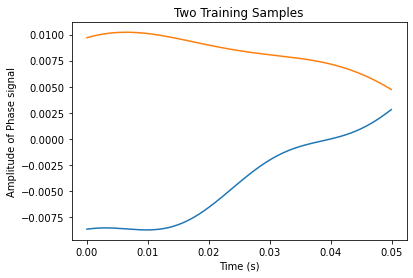

[1.62371996 1.62371996 1.62371996 ... 1.75596211 1.75596211 1.75596211]


In [43]:
x = 50
t = np.arange(0,1,1/10000)
t = t[0:firstLayerLength]

plt.plot(t,x_train[x,:],t,x_train[1,:]) #Plot two training sample at random to verify output
plt.ylabel('Amplitude of Phase signal')
plt.xlabel('Time (s)')
plt.title('Two Training Samples')
plt.show()
print(y_train[x])

# Set up Model


In [9]:
#Create model in spec to the prior research
model = Sequential()
model.add(Input(shape=(x_train.shape[1], )))

model.add(Dense(2,input_shape  = (x_train.shape[1],)))
model.add(Dense(2))
model.add(Dense(3))
model.add(Dense(1))

In [10]:

#set up optimizer and set the metric to MSE
model.compile(loss=keras.losses.mean_squared_error,
              optimizer=keras.optimizers.Nadam(learning_rate=0.001)
,
                  metrics=[keras.metrics.MeanSquaredError()])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 1002      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 1,021
Trainable params: 1,021
Non-trainable params: 0
_________________________________________________________________


### Convert class vectors to binary class matrices ###

This is the one to use with the `categorical_crossentropy` loss.

In [16]:
batch_size = 100  # Set the batch size
epochs = 20 # Set the number of epochs

print(model.inputs[0].dtype)


<dtype: 'float32'>


### Train the Model ###

In [17]:
# One Hidden Layer
initializer = keras.initializers.RandomNormal(mean=0., stddev=5.)

hist = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.18,
          callbacks=None)



score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
74/74 [==============================] - 1s 17ms/step - loss: 0.0830 - mean_squared_error: 0.0830 - val_loss: 0.0783 - val_mean_squared_error: 0.0783
Epoch 2/20
74/74 [==============================] - 1s 13ms/step - loss: 0.0830 - mean_squared_error: 0.0830 - val_loss: 0.0793 - val_mean_squared_error: 0.0793
Epoch 3/20
74/74 [==============================] - 1s 13ms/step - loss: 0.0830 - mean_squared_error: 0.0830 - val_loss: 0.0780 - val_mean_squared_error: 0.0780
Epoch 4/20
74/74 [==============================] - 1s 14ms/step - loss: 0.0830 - mean_squared_error: 0.0830 - val_loss: 0.0778 - val_mean_squared_error: 0.0778
Epoch 5/20
74/74 [==============================] - 1s 11ms/step - loss: 0.0829 - mean_squared_error: 0.0829 - val_loss: 0.0778 - val_mean_squared_error: 0.0778
Epoch 6/20
74/74 [==============================] - 1s 12ms/step - loss: 0.0830 - mean_squared_error: 0.0830 - val_loss: 0.0777 - val_mean_squared_error: 0.0777
Epoch 7/20
74/74 [================

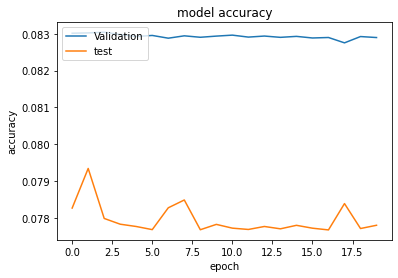

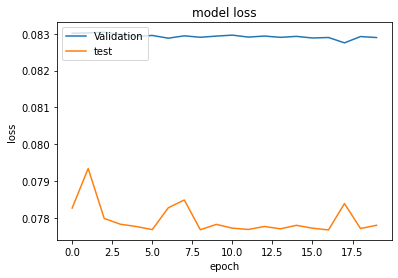

In [44]:
plt.plot(hist.history['mean_squared_error'])
plt.plot(hist.history['val_mean_squared_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Validation', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Validation', 'test'], loc='upper left')
plt.show()


In [45]:
print(hist.history.keys())

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


In [63]:
fEst = np.zeros(y_test.shape) 


for k in range(0,x_test.shape[1] - 500):
    ttemp = model.predict(x_test[:,k:k+500])
    fEst[:,k:k+500] =ttemp
    




0.0
0.003999840006399744
0.007999680012799487
0.011999520019199232
0.015999360025598975
0.019999200031998718
0.023999040038398464
0.02799888004479821
0.03199872005119795
0.035998560057597696
0.039998400063997436
0.04399824007039718
0.04799808007679693
0.05199792008319667
0.05599776008959642
0.05999760009599616
0.0639974401023959
0.06799728010879565
0.07199712011519539
0.07599696012159514
0.07999680012799487
0.08399664013439463
0.08799648014079436
0.09199632014719411
0.09599616015359386
0.09999600015999359
0.10399584016639334
0.1079956801727931
0.11199552017919284
0.11599536018559257
0.11999520019199232
0.12399504019839207
0.1279948802047918
0.13199472021119155
0.1359945602175913
0.13999440022399104
0.14399424023039079
0.14799408023679053
0.15199392024319028
0.15599376024959002
0.15999360025598974
0.1639934402623895
0.16799328026878926
0.171993120275189
0.17599296028158873
0.17999280028798847
0.18399264029438822
0.18799248030078797
0.1919923203071877
0.19599216031358746
0.19999200031998

1.7199312027518898
1.7239310427582897
1.7279308827646895
1.7319307227710892
1.735930562777489
1.7399304027838884
1.7439302427902883
1.7479300827966882
1.7519299228030878
1.7559297628094876
1.7599296028158875
1.763929442822287
1.7679292828286868
1.7719291228350869
1.7759289628414863
1.7799288028478861
1.7839286428542858
1.7879284828606856
1.7919283228670855
1.795928162873485
1.7999280028798847
1.8039278428862846
1.8079276828926842
1.811927522899084
1.8159273629054835
1.8199272029118836
1.8239270429182834
1.8279268829246829
1.8319267229310827
1.8359265629374826
1.8399264029438822
1.843926242950282
1.847926082956682
1.8519259229630813
1.8559257629694812
1.8599256029758808
1.8639254429822807
1.8679252829886805
1.87192512299508
1.87592496300148
1.87992480300788
1.8839246430142793
1.8879244830206792
1.891924323027079
1.8959241630334787
1.8999240030398785
1.903923843046278
1.9079236830526778
1.9119235230590776
1.9159233630654773
1.9199232030718771
1.923923043078277
1.9279228830846766
1.931922

3.4758609655613775
3.479860805567777
3.483860645574177
3.4878604855805766
3.491860325586976
3.4958601655933763
3.499860005599776
3.5038598456061756
3.507859685612576
3.5118595256189753
3.5158593656253747
3.519859205631775
3.5238590456381744
3.527858885644574
3.531858725650974
3.5358585656573736
3.5398584056637734
3.5438582456701737
3.547858085676573
3.5518579256829725
3.555857765689372
3.5598576056957723
3.5638574457021717
3.5678572857085715
3.5718571257149714
3.5758569657213712
3.5798568057277707
3.583856645734171
3.5878564857405704
3.59185632574697
3.59585616575337
3.5998560057597695
3.6038558457661694
3.607855685772569
3.611855525778969
3.6158553657853685
3.619855205791769
3.623855045798168
3.6278548858045676
3.631854725810967
3.6358545658173673
3.639854405823767
3.6438542458301666
3.647854085836567
3.6518539258429663
3.6558537658493657
3.659853605855766
3.6638534458621654
3.667853285868565
3.671853125874965
3.6758529658813646
3.6798528058877644
3.6838526458941647
3.687852485900564


5.2837886484540615
5.287788488460462
5.291788328466861
5.295788168473261
5.299788008479661
5.303787848486061
5.307787688492461
5.31178752849886
5.31578736850526
5.319787208511659
5.323787048518059
5.327786888524459
5.331786728530859
5.335786568537258
5.339786408543659
5.343786248550058
5.347786088556457
5.351785928562858
5.355785768569257
5.359785608575657
5.363785448582057
5.367785288588457
5.371785128594856
5.375784968601256
5.379784808607655
5.383784648614055
5.387784488620455
5.391784328626855
5.395784168633255
5.399784008639654
5.4037838486460545
5.4077836886524535
5.411783528658853
5.415783368665253
5.419783208671653
5.423783048678053
5.427782888684453
5.431782728690853
5.435782568697252
5.439782408703652
5.443782248710051
5.447782088716451
5.451781928722851
5.455781768729251
5.459781608735651
5.463781448742051
5.4677812887484505
5.4717811287548495
5.475780968761249
5.479780808767649
5.483780648774049
5.487780488780449
5.491780328786849
5.495780168793249
5.499780008799648
5.50377

7.099716011359545
7.103715851365945
7.107715691372345
7.111715531378744
7.115715371385145
7.1197152113915445
7.123715051397944
7.127714891404343
7.131714731410743
7.135714571417143
7.139714411423544
7.143714251429943
7.147714091436343
7.1517139314427425
7.1557137714491414
7.159713611455541
7.163713451461942
7.167713291468342
7.171713131474741
7.175712971481141
7.179712811487541
7.18371265149394
7.187712491500339
7.19171233150674
7.19571217151314
7.199712011519539
7.203711851525939
7.207711691532339
7.211711531538738
7.215711371545138
7.219711211551538
7.223711051557938
7.227710891564337
7.231710731570737
7.235710571577137
7.239710411583538
7.2437102515899365
7.247710091596336
7.251709931602736
7.255709771609135
7.259709611615535
7.263709451621934
7.267709291628336
7.271709131634735
7.2757089716411345
7.279708811647534
7.283708651653933
7.287708491660333
7.291708331666734
7.295708171673134
7.299708011679533
7.303707851685933
7.307707691692332
7.311707531698731
7.315707371705132
7.319707

8.943642254309827
8.947642094316228
8.951641934322627
8.955641774329026
8.959641614335426
8.963641454341827
8.967641294348226
8.971641134354625
8.975640974361026
8.979640814367425
8.983640654373826
8.987640494380225
8.991640334386625
8.995640174393024
8.999640014399423
9.003639854405824
9.007639694412225
9.011639534418624
9.015639374425023
9.019639214431423
9.023639054437822
9.027638894444221
9.031638734450622
9.035638574457023
9.039638414463422
9.04363825446982
9.047638094476222
9.05163793448262
9.05563777448902
9.05963761449542
9.063637454501821
9.06763729450822
9.071637134514619
9.07563697452102
9.079636814527419
9.08363665453382
9.087636494540218
9.09163633454662
9.095636174553018
9.099636014559417
9.103635854565816
9.107635694572217
9.111635534578618
9.115635374585016
9.119635214591417
9.123635054597816
9.127634894604215
9.131634734610614
9.135634574617017
9.139634414623416
9.143634254629815
9.147634094636214
9.151633934642614
9.155633774649013
9.159633614655414
9.163633454661815


10.743570257189711
10.747570097196112
10.751569937202513
10.755569777208912
10.75956961721531
10.763569457221712
10.76756929722811
10.77156913723451
10.77556897724091
10.779568817247311
10.78356865725371
10.787568497260109
10.79156833726651
10.795568177272909
10.799568017279308
10.803567857285708
10.807567697292109
10.811567537298508
10.815567377304907
10.819567217311308
10.823567057317707
10.827566897324107
10.831566737330506
10.835566577336907
10.839566417343306
10.843566257349705
10.847566097356106
10.851565937362507
10.855565777368906
10.859565617375305
10.863565457381705
10.867565297388104
10.871565137394503
10.875564977400904
10.879564817407305
10.883564657413704
10.887564497420103
10.891564337426503
10.895564177432902
10.899564017439301
10.903563857445702
10.907563697452103
10.911563537458502
10.9155633774649
10.919563217471302
10.9235630574777
10.927562897484101
10.9315627374905
10.935562577496901
10.9395624175033
10.943562257509699
10.9475620975161
10.951561937522499
10.955561

12.487500499980001
12.4915003399864
12.495500179992801
12.4995000199992
12.503499860005599
12.507499700012001
12.5114995400184
12.5154993800248
12.5194992200312
12.523499060037599
12.527498900043998
12.531498740050399
12.535498580056798
12.539498420063197
12.543498260069597
12.547498100075996
12.551497940082395
12.555497780088794
12.559497620095197
12.563497460101598
12.567497300107997
12.571497140114396
12.575496980120796
12.579496820127195
12.583496660133594
12.587496500139995
12.591496340146394
12.595496180152793
12.599496020159192
12.603495860165593
12.607495700171995
12.611495540178394
12.615495380184793
12.619495220191194
12.623495060197593
12.627494900203992
12.631494740210393
12.635494580216792
12.63949442022319
12.64349426022959
12.64749410023599
12.65149394024239
12.655493780248788
12.65949362025519
12.663493460261591
12.66749330026799
12.67149314027439
12.67549298028079
12.679492820287189
12.683492660293588
12.687492500299987
12.691492340306388
12.695492180312787
12.69949202

14.23543058277669
14.239430422783089
14.243430262789488
14.247430102795889
14.251429942802288
14.255429782808687
14.259429622815087
14.263429462821486
14.267429302827885
14.271429142834286
14.275428982840687
14.279428822847088
14.283428662853487
14.287428502859886
14.291428342866286
14.295428182872685
14.299428022879084
14.303427862885485
14.307427702891884
14.311427542898283
14.315427382904684
14.319427222911083
14.323427062917482
14.327426902923884
14.331426742930283
14.335426582936684
14.339426422943083
14.343426262949482
14.347426102955882
14.351425942962281
14.35542578296868
14.359425622975081
14.36342546298148
14.36742530298788
14.37142514299428
14.375424983000679
14.379424823007081
14.38342466301348
14.38742450301988
14.39142434302628
14.395424183032679
14.399424023039078
14.403423863045479
14.407423703051878
14.411423543058277
14.415423383064677
14.419423223071076
14.423423063077475
14.427422903083878
14.431422743090277
14.435422583096678
14.439422423103077
14.443422263109476
1

15.983360665573375
15.987360505579776
15.991360345586175
15.995360185592578
15.999360025598977
16.003359865605375
16.007359705611776
16.011359545618177
16.015359385624574
16.019359225630975
16.023359065637376
16.027358905643773
16.031358745650174
16.035358585656574
16.03935842566297
16.043358265669372
16.047358105675773
16.051357945682174
16.055357785688575
16.05935762569497
16.063357465701372
16.067357305707773
16.07135714571417
16.07535698572057
16.079356825726972
16.08335666573337
16.08735650573977
16.09135634574617
16.09535618575257
16.099356025758972
16.10335586576537
16.10735570577177
16.11135554577817
16.115355385784568
16.11935522579097
16.12335506579737
16.127354905803767
16.131354745810167
16.135354585816568
16.139354425822965
16.143354265829366
16.147354105835767
16.151353945842168
16.15535378584857
16.159353625854965
16.163353465861366
16.167353305867767
16.171353145874164
16.175352985880565
16.179352825886966
16.183352665893363
16.187352505899764
16.19135234590616
16.19535

17.743290268389263
17.747290108395664
17.751289948402064
17.75528978840846
17.759289628414862
17.763289468421263
17.767289308427664
17.771289148434064
17.77528898844046
17.779288828446862
17.783288668453263
17.78728850845966
17.79128834846606
17.795288188472462
17.79928802847886
17.80328786848526
17.80728770849166
17.811287548498058
17.815287388504462
17.81928722851086
17.82328706851726
17.82728690852366
17.831286748530058
17.83528658853646
17.83928642854286
17.843286268549257
17.847286108555657
17.851285948562058
17.855285788568455
17.859285628574856
17.863285468581257
17.867285308587658
17.87128514859406
17.875284988600455
17.879284828606856
17.883284668613257
17.887284508619654
17.891284348626055
17.895284188632456
17.899284028638853
17.903283868645254
17.907283708651654
17.91128354865805
17.915283388664456
17.919283228670853
17.923283068677254
17.927282908683654
17.93128274869005
17.935282588696452
17.939282428702853
17.94328226870925
17.94728210871565
17.951281948722052
17.9552817

19.51521939122435
19.51921923123075
19.52321907123715
19.527218911243548
19.531218751249952
19.53521859125635
19.53921843126275
19.54321827126915
19.547218111275548
19.55121795128195
19.55521779128835
19.559217631294747
19.563217471301147
19.567217311307548
19.571217151313945
19.575216991320346
19.579216831326747
19.583216671333147
19.587216511339548
19.591216351345945
19.595216191352346
19.599216031358747
19.603215871365144
19.607215711371545
19.611215551377946
19.615215391384343
19.619215231390744
19.623215071397144
19.62721491140354
19.631214751409946
19.635214591416343
19.639214431422744
19.643214271429144
19.64721411143554
19.651213951441942
19.655213791448343
19.65921363145474
19.66321347146114
19.667213311467542
19.67121315147394
19.67521299148034
19.67921283148674
19.68321267149314
19.687212511499542
19.69121235150594
19.69521219151234
19.69921203151874
19.703211871525138
19.70721171153154
19.71121155153794
19.715211391544337
19.719211231550737
19.723211071557138
19.72721091156

21.287148514059435
21.291148354065836
21.295148194072237
21.299148034078637
21.303147874085038
21.30714771409144
21.311147554097836
21.315147394104237
21.319147234110638
21.323147074117035
21.327146914123436
21.331146754129833
21.335146594136233
21.339146434142634
21.34314627414903
21.347146114155432
21.351145954161836
21.355145794168234
21.359145634174634
21.36314547418103
21.367145314187432
21.371145154193833
21.37514499420023
21.37914483420663
21.383144674213032
21.38714451421943
21.39114435422583
21.39514419423223
21.399144034238628
21.403143874245032
21.407143714251433
21.41114355425783
21.41514339426423
21.419143234270628
21.42314307427703
21.42714291428343
21.431142754289827
21.435142594296227
21.439142434302628
21.443142274309025
21.447142114315426
21.451141954321827
21.455141794328227
21.459141634334628
21.463141474341025
21.467141314347426
21.471141154353827
21.475140994360224
21.479140834366625
21.483140674373026
21.487140514379423
21.491140354385823
21.495140194392224
21.49

23.055077796888124
23.059077636894525
23.063077476900922
23.067077316907323
23.071077156913724
23.075076996920124
23.079076836926525
23.083076676932922
23.087076516939323
23.091076356945724
23.09507619695212
23.09907603695852
23.103075876964922
23.10707571697132
23.11107555697772
23.115075396984118
23.119075236990522
23.123075076996923
23.12707491700332
23.13107475700972
23.13507459701612
23.13907443702252
23.14307427702892
23.14707411703532
23.151073957041717
23.155073797048118
23.15907363705452
23.163073477060916
23.167073317067317
23.171073157073717
23.175072997080118
23.17907283708652
23.183072677092916
23.187072517099317
23.191072357105718
23.195072197112115
23.199072037118516
23.203071877124913
23.207071717131313
23.211071557137714
23.21507139714411
23.219071237150516
23.223071077156916
23.227070917163314
23.231070757169714
23.235070597176115
23.239070437182512
23.243070277188913
23.247070117195314
23.25106995720171
23.25506979720811
23.25906963721451
23.26306947722091
23.2670693

24.819007239710412
24.82300707971681
24.82700691972321
24.83100675972961
24.83500659973601
24.839006439742413
24.84300627974881
24.84700611975521
24.85100595976161
24.85500579976801
24.85900563977441
24.86300547978081
24.867005319787207
24.871005159793608
24.87500499980001
24.879004839806406
24.883004679812807
24.887004519819207
24.891004359825608
24.89500419983201
24.899004039838406
24.903003879844807
24.907003719851208
24.911003559857605
24.915003399864005
24.919003239870406
24.923003079876803
24.927002919883204
24.931002759889605
24.935002599896002
24.939002439902406
24.943002279908804
24.947002119915204
24.951001959921605
24.955001799928002
24.959001639934403
24.963001479940804
24.9670013199472
24.9710011599536
24.975000999960002
24.9790008399664
24.9830006799728
24.9870005199792
24.991000359985602
24.995000199992003
24.9990000399984
25.0029998800048
25.006999720011198
25.0109995600176
25.014999400024003
25.0189992400304
25.0229990800368
25.026998920043198
25.0309987600496
25.03499

26.5949362025519
26.598936042558297
26.602935882564697
26.606935722571095
26.6109355625775
26.614935402583896
26.618935242590297
26.622935082596694
26.626934922603095
26.6309347626095
26.634934602615896
26.638934442622297
26.642934282628694
26.646934122635095
26.650933962641492
26.654933802647896
26.658933642654294
26.662933482660694
26.66693332266709
26.670933162673492
26.67493300267989
26.678932842686294
26.682932682692694
26.68693252269909
26.690932362705492
26.69493220271189
26.698932042718294
26.70293188272469
26.706931722731092
26.71093156273749
26.71493140274389
26.718931242750287
26.72293108275669
26.72693092276309
26.73093076276949
26.73493060277589
26.738930442782287
26.74293028278869
26.74693012279509
26.75092996280149
26.754929802807887
26.758929642814287
26.762929482820685
26.76692932282709
26.770929162833486
26.774929002839887
26.778928842846284
26.782928682852685
26.78692852285909
26.790928362865486
26.794928202871887
26.798928042878284
26.802927882884685
26.806927722891

28.362865485380585
28.366865325386986
28.370865165393383
28.374865005399784
28.37886484540618
28.382864685412585
28.386864525418982
28.390864365425383
28.39486420543178
28.39886404543818
28.402863885444585
28.406863725450982
28.410863565457383
28.41486340546378
28.418863245470185
28.42286308547658
28.426862925482983
28.43086276548938
28.43486260549578
28.438862445502178
28.44286228550858
28.446862125514976
28.45086196552138
28.45486180552778
28.458861645534178
28.46286148554058
28.466861325546976
28.47086116555338
28.474861005559777
28.478860845566178
28.482860685572575
28.486860525578976
28.490860365585373
28.494860205591777
28.498860045598175
28.502859885604575
28.50685972561098
28.510859565617373
28.514859405623778
28.518859245630175
28.522859085636576
28.526858925642973
28.530858765649374
28.53485860565577
28.538858445662175
28.542858285668572
28.546858125674973
28.550857965681374
28.55485780568777
28.558857645694175
28.562857485700572
28.566857325706973
28.57085716571337
28.574857

30.13479460821567
30.13879444822207
30.14279428822847
30.146794128234873
30.150793968241267
30.15479380824767
30.15879364825407
30.16279348826047
30.166793328266873
30.17079316827327
30.17479300827967
30.17879284828607
30.18279268829247
30.186792528298867
30.19079236830527
30.194792208311664
30.19879204831807
30.202791888324466
30.206791728330867
30.210791568337264
30.214791408343665
30.21879124835007
30.222791088356466
30.226790928362867
30.230790768369264
30.23479060837567
30.238790448382062
30.242790288388466
30.246790128394863
30.250789968401264
30.25478980840766
30.258789648414066
30.26278948842046
30.266789328426864
30.270789168433264
30.27478900843966
30.278788848446066
30.28278868845246
30.286788528458864
30.29078836846526
30.29478820847166
30.29878804847806
30.30278788848446
30.306787728490857
30.31078756849726
30.31478740850366
30.31878724851006
30.322787088516463
30.326786928522857
30.33078676852926
30.33478660853566
30.33878644854206
30.342786288548456
30.34678612855486
30.

31.906723731050757
31.910723571057158
31.914723411063555
31.91872325106996
31.922723091076357
31.926722931082757
31.930722771089155
31.934722611095555
31.93872245110196
31.942722291108357
31.946722131114758
31.950721971121155
31.954721811127555
31.958721651133953
31.962721491140357
31.96672133114675
31.970721171153155
31.974721011159552
31.978720851165953
31.98272069117235
31.986720531178754
31.990720371185155
31.994720211191552
31.998720051197953
32.00271989120435
32.00671973121075
32.01071957121715
32.01471941122355
32.018719251229946
32.022719091236354
32.02671893124275
32.03071877124915
32.03471861125555
32.03871845126195
32.04271829126835
32.04671813127475
32.05071797128115
32.054717811287546
32.05871765129395
32.06271749130035
32.06671733130675
32.07071717131315
32.07471701131955
32.07871685132594
32.082716691332344
32.086716531338745
32.090716371345145
32.094716211351546
32.09871605135795
32.10271589136435
32.10671573137074
32.11071557137715
32.11471541138354
32.11871525138994
3

33.71065157393704
33.71465141394344
33.718651253949844
33.72265109395624
33.726650933962645
33.73065077396904
33.73465061397544
33.73865045398184
33.74265029398824
33.746650133994635
33.75064997400104
33.75464981400744
33.75864965401384
33.762649494020245
33.76664933402664
33.77064917403304
33.77464901403944
33.77864885404584
33.782648694052234
33.78664853405864
33.790648374065036
33.79464821407144
33.79864805407784
33.80264789408424
33.80664773409064
33.81064757409703
33.81464741410344
33.818647254109834
33.822647094116235
33.826646934122635
33.830646774129036
33.83464661413543
33.83864645414184
33.84264629414823
33.84664613415463
33.85064597416103
33.854645814167434
33.858645654173834
33.862645494180235
33.866645334186636
33.87064517419303
33.87464501419943
33.87864485420583
33.88264469421223
33.88664453421863
33.89064437422503
33.89464421423143
33.89864405423783
33.90264389424423
33.90664373425063
33.91064357425703
33.91464341426343
33.91864325426983
33.922643094276225
33.9266429342

35.522579096836125
35.526578936842526
35.53057877684893
35.53457861685533
35.53857845686173
35.54257829686813
35.54657813687452
35.55057797688092
35.554577816887324
35.558577656893725
35.56257749690012
35.566577336906526
35.57057717691292
35.57457701691932
35.57857685692573
35.58257669693212
35.58657653693852
35.590576376944924
35.594576216951324
35.59857605695772
35.602575896964126
35.60657573697052
35.61057557697692
35.61457541698332
35.61857525698972
35.622575096996115
35.626574937002516
35.630574777008924
35.63457461701532
35.63857445702172
35.64257429702812
35.64657413703452
35.650573977040914
35.65457381704732
35.658573657053715
35.662573497060116
35.66657333706652
35.67057317707292
35.67457301707931
35.67857285708572
35.68257269709212
35.68657253709851
35.69057237710492
35.694572217111315
35.698572057117715
35.702571897124116
35.70657173713052
35.71057157713691
35.71457141714332
35.71857125714971
35.72257109715611
35.72657093716251
35.730570777168914
35.734570617175315
35.738570

37.32650693972241
37.330506779728815
37.33450661973521
37.33850645974161
37.34250629974801
37.34650613975441
37.35050597976081
37.35450581976721
37.35850565977361
37.362505499780006
37.36650533978641
37.37050517979281
37.37450501979921
37.3785048598056
37.38250469981201
37.386504539818404
37.390504379824804
37.39450421983121
37.398504059837606
37.40250389984401
37.40650373985041
37.41050357985681
37.4145034198632
37.41850325986961
37.422503099876
37.426502939882404
37.430502779888805
37.434502619895206
37.4385024599016
37.44250229990801
37.44650213991441
37.4505019799208
37.4545018199272
37.4585016599336
37.462501499940004
37.466501339946404
37.470501179952805
37.4745010199592
37.4785008599656
37.482500699972
37.4865005399784
37.490500379984795
37.4945002199912
37.4985000599976
37.502499900004
37.506499740010405
37.5104995800168
37.5144994200232
37.5184992600296
37.522499100036
37.526498940042394
37.5304987800488
37.534498620055196
37.5384984600616
37.542498300068
37.5464981400744
37.5

39.1384344626215
39.14243430262789
39.1464341426343
39.15043398264069
39.15443382264709
39.15843366265349
39.162433502659894
39.166433342666295
39.170433182672696
39.174433022679096
39.17843286268549
39.18243270269189
39.18643254269829
39.19043238270469
39.19443222271109
39.198432062717494
39.20243190272389
39.20643174273029
39.21043158273669
39.21443142274309
39.21843126274949
39.22243110275589
39.22643094276229
39.230430782768686
39.23443062277509
39.23843046278149
39.24243030278789
39.24643014279429
39.25042998280069
39.25442982280708
39.25842966281349
39.26242950281989
39.266429342826285
39.270429182832686
39.27442902283909
39.27842886284549
39.28242870285189
39.28642854285829
39.29042838286468
39.29442822287108
39.298428062877484
39.302427902883885
39.30642774289028
39.310427582896686
39.31442742290309
39.31842726290948
39.32242710291589
39.32642694292228
39.33042678292868
39.334426622935084
39.338426462941484
39.34242630294788
39.346426142954286
39.35042598296068
39.3544258229670

40.95436182552698
40.958361665533374
40.96236150553978
40.966361345546176
40.970361185552576
40.97436102555898
40.97836086556538
40.98236070557178
40.98636054557818
40.99036038558458
40.994360225590974
40.998360065597375
41.002359905603775
41.006359745610176
41.01035958561658
41.01435942562298
41.01835926562937
41.02235910563577
41.02635894564217
41.03035878564857
41.034358625654974
41.038358465661375
41.042358305667776
41.04635814567417
41.05035798568058
41.05435782568697
41.05835766569337
41.06235750569977
41.06635734570617
41.07035718571257
41.074357025718975
41.07835686572537
41.08235670573177
41.08635654573817
41.09035638574457
41.09435622575097
41.09835606575737
41.10235590576377
41.106355745770166
41.11035558577657
41.11435542578297
41.11835526578937
41.12235510579577
41.12635494580217
41.130354785808564
41.134354625814964
41.13835446582137
41.142354305827766
41.14635414583417
41.15035398584057
41.15435382584697
41.15835366585336
41.16235350585977
41.16635334586616
41.1703531858

42.75428982840687
42.75828966841326
42.76228950841966
42.766289348426064
42.770289188432464
42.77428902843886
42.778288868445266
42.78228870845166
42.78628854845806
42.79028838846446
42.79428822847086
42.798288068477255
42.80228790848366
42.806287748490064
42.81028758849646
42.814287428502865
42.81828726850926
42.82228710851566
42.82628694852206
42.83028678852846
42.834286628534855
42.838286468541256
42.842286308547656
42.84628614855406
42.85028598856046
42.85428582856686
42.85828566857326
42.86228550857965
42.86628534858606
42.870285188592455
42.874285028598855
42.878284868605256
42.88228470861166
42.88628454861805
42.89028438862446
42.89428422863085
42.89828406863725
42.90228390864365
42.906283748650054
42.910283588656455
42.914283428662856
42.918283268669256
42.92228310867565
42.92628294868205
42.93028278868845
42.93428262869485
42.93828246870125
42.942282308707654
42.94628214871405
42.95028198872045
42.954281828726856
42.95828166873325
42.96228150873965
42.96628134874605
42.9702811

44.55421783128675
44.55821767129315
44.562217511299544
44.56621735130595
44.57021719131235
44.574217031318746
44.57821687132515
44.58221671133155
44.58621655133795
44.59021639134434
44.59421623135075
44.59821607135714
44.602215911363544
44.606215751369945
44.610215591376345
44.61421543138274
44.61821527138915
44.62221511139555
44.62621495140194
44.63021479140835
44.63421463141474
44.63821447142114
44.642214311427544
44.646214151433945
44.65021399144034
44.65421383144674
44.65821367145314
44.66221351145954
44.66621335146594
44.67021319147234
44.67421303147874
44.67821287148514
44.682212711491545
44.68621255149794
44.69021239150434
44.69421223151074
44.69821207151714
44.702211911523534
44.70621175152994
44.710211591536336
44.714211431542736
44.71821127154914
44.72221111155554
44.72621095156194
44.73021079156834
44.73421063157474
44.738210471581134
44.74221031158754
44.746210151593935
44.750209991600336
44.75420983160674
44.75820967161314
44.76220951161953
44.76620935162593
44.77020919163

46.35814567417304
46.36214551417943
46.36614535418583
46.37014519419223
46.374145034198634
46.37814487420503
46.382144714211435
46.38614455421783
46.39014439422423
46.39414423423063
46.39814407423703
46.40214391424343
46.406143754249825
46.41014359425623
46.41414343426263
46.41814327426903
46.42214311427543
46.42614295428183
46.43014279428822
46.43414263429463
46.43814247430103
46.442142314307425
46.44614215431383
46.45014199432023
46.45414183432663
46.45814167433303
46.46214151433943
46.46614135434582
46.47014119435223
46.474141034358624
46.478140874365025
46.482140714371425
46.486140554377826
46.49014039438423
46.49414023439063
46.49814007439703
46.50213991440342
46.50613975440982
46.51013959441622
46.514139434422624
46.51813927442902
46.522139114435426
46.52613895444182
46.53013879444822
46.53413863445462
46.53813847446102
46.54213831446742
46.54613815447382
46.550137994480224
46.55413783448662
46.558137674493025
46.56213751449942
46.56613735450582
46.57013719451222
46.5741370345186

48.16207351705932
48.16607335706572
48.170073197072114
48.17407303707852
48.178072877084915
48.182072717091316
48.18607255709772
48.19007239710412
48.19407223711051
48.19807207711692
48.20207191712331
48.20607175712971
48.210071597136114
48.214071437142515
48.218071277148915
48.222071117155316
48.22607095716172
48.23007079716811
48.23407063717451
48.23807047718091
48.24207031718731
48.246070157193714
48.250069997200114
48.25406983720651
48.25806967721291
48.26206951721932
48.26606935722571
48.27006919723211
48.27406903723851
48.27806887724491
48.282068717251306
48.286068557257714
48.29006839726411
48.29406823727051
48.29806807727691
48.30206791728331
48.3060677572897
48.31006759729611
48.31406743730251
48.318067277308906
48.32206711731531
48.32606695732171
48.33006679732811
48.3340666373345
48.33806647734091
48.3420663173473
48.346066157353704
48.350065997360105
48.354065837366505
48.358065677372906
48.36206551737931
48.36606535738571
48.3700651973921
48.37406503739851
48.3780648774049

49.9620015199392
49.9660013599456
49.970001199952
49.9740010399584
49.9780008799648
49.982000719971204
49.9860005599776
49.990000399984005
49.9940002399904
49.9980000799968
50.0019999200032
50.0059997600096
50.009999600015995
50.013999440022396
50.0179992800288
50.0219991200352
50.0259989600416
50.029998800048006
50.0339986400544
50.0379984800608
50.041998320067194
50.0459981600736
50.049998000079995
50.053997840086396
50.05799768009279
50.0619975200992
50.0659973601056
50.06999720011199
50.07399704011839
50.0779968801248
50.081996720131194
50.08599656013759
50.089996400144
50.093996240150396
50.09799608015679
50.10199592016319
50.1059957601696
50.10999560017599
50.11399544018239
50.11799528018879
50.121995120195194
50.125994960201595
50.12999480020799
50.1339946402144
50.13799448022079
50.14199432022719
50.145994160233585
50.14999400023999
50.15399384024639
50.15799368025279
50.16199352025919
50.165993360265595
50.16999320027199
50.17399304027839
50.17799288028479
50.18199272029119
50

51.76992920283189
51.77392904283828
51.777928882844684
51.78192872285109
51.785928562857485
51.789928402863886
51.793928242870294
51.79792808287669
51.80192792288308
51.80592776288948
51.80992760289589
51.81392744290228
51.817927282908684
51.82192712291508
51.825926962921486
51.829926802927886
51.83392664293428
51.837926482940674
51.84192632294709
51.84592616295348
51.849926002959876
51.853925842966284
51.857925682972684
51.86192552297908
51.86592536298548
51.86992520299189
51.87392504299828
51.87792488300468
51.881924723011075
51.88592456301748
51.889924403023876
51.89392424303028
51.897924083036685
51.90192392304308
51.90592376304948
51.90992360305587
51.91392344306228
51.91792328306868
51.921923123075075
51.925922963081476
51.92992280308788
51.93392264309428
51.93792248310067
51.94192232310707
51.94592216311348
51.94992200311987
51.953921843126274
51.95792168313268
51.961921523139075
51.965921363145476
51.96992120315187
51.97392104315828
51.97792088316467
51.98192072317107
51.985920

53.57385704571818
53.57785688572457
53.58185672573097
53.585856565737366
53.589856405743774
53.593856245750175
53.59785608575657
53.60185592576296
53.60585576576937
53.60985560577577
53.613855445782164
53.61785528578857
53.62185512579497
53.625854965801366
53.62985480580777
53.633854645814175
53.63785448582057
53.64185432582696
53.64585416583336
53.64985400583977
53.653853845846164
53.657853685852565
53.66185352585896
53.66585336586537
53.66985320587177
53.67385304587816
53.67785288588457
53.68185272589096
53.68585256589736
53.68985240590376
53.693852245910165
53.697852085916566
53.70185192592296
53.70585176592936
53.70985160593577
53.71385144594216
53.71785128594856
53.72185112595497
53.725850965961364
53.72985080596776
53.73385064597416
53.737850485980566
53.74185032598696
53.74585016599336
53.749850005999754
53.75384984600616
53.75784968601256
53.761849526018956
53.765849366025364
53.769849206031765
53.77384904603816
53.77784888604455
53.78184872605096
53.78584856605736
53.789848406

55.37778488860445
55.38178472861086
55.38578456861726
55.389784408623655
55.39378424863005
55.397784088636456
55.40178392864286
55.40578376864925
55.40978360865565
55.41378344866206
55.41778328866845
55.42178312867485
55.42578296868125
55.429782808687655
55.43378264869405
55.43778248870045
55.44178232870686
55.44578216871325
55.44978200871965
55.453781848726045
55.45778168873245
55.461781528738854
55.46578136874525
55.46978120875165
55.473781048758056
55.47778088876445
55.48178072877084
55.48578056877725
55.48978040878365
55.493780248790046
55.497780088796446
55.501779928802854
55.50577976880925
55.50977960881565
55.51377944882204
55.51777928882845
55.52177912883485
55.525778968841244
55.52977880884764
55.533778648854046
55.53777848886045
55.54177832886684
55.54577816887325
55.54977800887965
55.55377784888604
55.55777768889244
55.56177752889885
55.565777368905245
55.56977720891164
55.57377704891804
55.57777688892445
55.58177672893084
55.58577656893724
55.58977640894365
55.5937762489500

57.185712571497135
57.189712411503535
57.19371225150994
57.19771209151634
57.20171193152274
57.205711771529145
57.20971161153554
57.21371145154194
57.21771129154833
57.22171113155474
57.22571097156114
57.229710811567536
57.23371065157393
57.23771049158034
57.24171033158674
57.24571017159313
57.24971001159953
57.25370985160594
57.257709691612334
57.261709531618735
57.26570937162514
57.269709211631536
57.27370905163794
57.27770889164433
57.28170873165074
57.28570857165713
57.28970841166353
57.293708251669926
57.297708091676334
57.301707931682735
57.30570777168913
57.309707611695536
57.31370745170194
57.31770729170833
57.321707131714724
57.32570697172113
57.32970681172753
57.33370665173393
57.33770649174033
57.341706331746735
57.34570617175313
57.34970601175953
57.35370585176594
57.35770569177233
57.361705531778725
57.365705371785126
57.36970521179153
57.37370505179793
57.37770489180433
57.38170473181072
57.38570457181713
57.38970441182353
57.393704251829924
57.397704091836324
57.40170393

59.001639934402625
59.005639774409026
59.00963961441542
59.01363945442182
59.01763929442823
59.02163913443462
59.02563897444102
59.029638814447424
59.033638654453824
59.03763849446022
59.04163833446662
59.04563817447303
59.04963801447942
59.05363785448582
59.057637694492215
59.06163753449862
59.06563737450502
59.06963721451142
59.073637054517825
59.07763689452422
59.08163673453062
59.08563657453701
59.08963641454342
59.09363625454982
59.097636094556215
59.101635934562616
59.10563577456902
59.10963561457542
59.11363545458181
59.11763529458821
59.12163513459462
59.12563497460101
59.129634814607414
59.13363465461382
59.137634494620215
59.141634334626616
59.14563417463301
59.14963401463942
59.15363385464582
59.15763369465221
59.161633534658606
59.16563337466501
59.169633214671414
59.17363305467781
59.177632894684216
59.181632734690616
59.18563257469701
59.18963241470341
59.19363225470982
59.19763209471621
59.20163193472261
59.20563177472901
59.209631614735414
59.21363145474181
59.217631294

60.809567617295315
60.81356745730171
60.81756729730811
60.8215671373145
60.82556697732091
60.829566817327304
60.833566657333705
60.8375664973401
60.84156633734651
60.84556617735291
60.8495660173593
60.85356585736571
60.85756569737211
60.8615655373785
60.8655653773849
60.86956521739131
60.873565057397705
60.8775648974041
60.8815647374105
60.88556457741691
60.8895644174233
60.8935642574297
60.89756409743611
60.9015639374425
60.905563777448904
60.9095636174553
60.913563457461706
60.9175632974681
60.9215631374745
60.925562977480894
60.9295628174873
60.9335626574937
60.937562497500096
60.941562337506504
60.945562177512905
60.9495620175193
60.9535618575257
60.9575616975321
60.9615615375385
60.965561377544894
60.969561217551295
60.9735610575577
60.977560897564096
60.9815607375705
60.98556057757689
60.9895604175833
60.9935602575897
60.99756009759609
61.0015599376025
61.005559777608894
61.009559617615295
61.01355945762169
61.0175592976281
61.0215591376345
61.02555897764089
61.02955881764729
61.

62.62549498020079
62.629494820207185
62.63349466021359
62.637494500219994
62.64149434022639
62.64549418023279
62.649494020239196
62.65349386024559
62.65749370025199
62.6614935402584
62.66549338026479
62.669493220271185
62.673493060277586
62.677492900283994
62.68149274029039
62.68549258029679
62.68949242030318
62.69349226030959
62.69749210031599
62.701491940322384
62.705491780328785
62.709491620335186
62.71349146034159
62.71749130034798
62.72149114035439
62.72549098036079
62.72949082036718
62.73349066037358
62.73749050037999
62.741490340386385
62.745490180392785
62.74949002039918
62.75348986040559
62.75748970041198
62.76148954041838
62.76548938042479
62.76948922043118
62.77348906043758
62.77748890044398
62.781488740450385
62.785488580456786
62.78948842046318
62.79348826046957
62.79748810047599
62.80148794048238
62.805487780488775
62.809487620495176
62.813487460501584
62.81748730050798
62.82148714051438
62.825486980520786
62.82948682052718
62.83348666053358
62.837486500539974
62.84148634

64.43742250309987
64.44142234310628
64.44542218311268
64.44942202311907
64.45342186312547
64.45742170313189
64.46142154313827
64.46542138314467
64.46942122315107
64.47342106315747
64.47742090316387
64.48142074317028
64.48542058317668
64.48942042318308
64.49342026318948
64.49742010319586
64.50141994320228
64.50541978320868
64.50941962321507
64.51341946322147
64.51741930322787
64.52141914323427
64.52541898324067
64.52941882324707
64.53341866325347
64.53741850325987
64.54141834326627
64.54541818327267
64.54941802327907
64.55341786328546
64.55741770329186
64.56141754329828
64.56541738330466
64.56941722331106
64.57341706331746
64.57741690332386
64.58141674333027
64.58541658333667
64.58941642334307
64.59341626334947
64.59741610335587
64.60141594336226
64.60541578336867
64.60941562337507
64.61341546338146
64.61741530338786
64.62141514339427
64.62541498340066
64.62941482340706
64.63341466341348
64.63741450341986
64.64141434342626
64.64541418343266
64.64941402343906
64.65341386344546
64.6574137

66.27334906603735
66.27734890604376
66.28134874605016
66.28534858605656
66.28934842606296
66.29334826606936
66.29734810607576
66.30134794608216
66.30534778608855
66.30934762609496
66.31334746610136
66.31734730610775
66.32134714611415
66.32534698612056
66.32934682612695
66.33334666613335
66.33734650613975
66.34134634614615
66.34534618615255
66.34934602615895
66.35334586616536
66.35734570617176
66.36134554617816
66.36534538618454
66.36934522619096
66.37334506619736
66.37734490620375
66.38134474621015
66.38534458621656
66.38934442622295
66.39334426622935
66.39734410623575
66.40134394624215
66.40534378624855
66.40934362625495
66.41334346626135
66.41734330626775
66.42134314627415
66.42534298628054
66.42934282628696
66.43334266629336
66.43734250629974
66.44134234630614
66.44534218631254
66.44934202631894
66.45334186632535
66.45734170633175
66.46134154633815
66.46534138634455
66.46934122635095
66.47334106635735
66.47734090636375
66.48134074637014
66.48534058637654
66.48934042638295
66.4933402

68.10927562897484
68.11327546898124
68.11727530898764
68.12127514899404
68.12527498900045
68.12927482900683
68.13327466901325
68.13727450901965
68.14127434902603
68.14527418903243
68.14927402903884
68.15327386904524
68.15727370905164
68.16127354905804
68.16527338906444
68.16927322907084
68.17327306907724
68.17727290908364
68.18127274909004
68.18527258909643
68.18927242910283
68.19327226910924
68.19727210911563
68.20127194912203
68.20527178912843
68.20927162913483
68.21327146914123
68.21727130914763
68.22127114915403
68.22527098916044
68.22927082916684
68.23327066917322
68.23727050917964
68.24127034918604
68.24527018919242
68.24927002919883
68.25326986920524
68.25726970921163
68.26126954921803
68.26526938922443
68.26926922923083
68.27326906923723
68.27726890924363
68.28126874925003
68.28526858925643
68.28926842926283
68.29326826926922
68.29726810927563
68.30126794928204
68.30526778928842
68.30926762929482
68.31326746930124
68.31726730930762
68.32126714931402
68.32526698932043
68.3292668

69.95320187192512
69.95720171193153
69.96120155193792
69.96520139194432
69.96920123195072
69.97320107195712
69.97720091196352
69.98120075196992
69.98520059197632
69.98920043198272
69.99320027198912
69.99720011199551
70.00119995200193
70.00519979200833
70.00919963201471
70.01319947202111
70.01719931202753
70.02119915203392
70.02519899204032
70.02919883204672
70.03319867205312
70.03719851205952
70.04119835206592
70.04519819207232
70.04919803207872
70.05319787208512
70.05719771209151
70.06119755209792
70.06519739210432
70.06919723211071
70.07319707211711
70.07719691212351
70.08119675212991
70.08519659213631
70.08919643214271
70.09319627214911
70.09719611215552
70.10119595216192
70.10519579216832
70.10919563217472
70.1131954721811
70.1171953121875
70.12119515219392
70.1251949922003
70.12919483220671
70.13319467221311
70.13719451221951
70.14119435222591
70.14519419223231
70.14919403223871
70.15319387224511
70.15719371225151
70.1611935522579
70.16519339226431
70.16919323227071
70.17319307227

71.7971281148754
71.8011279548818
71.80512779488821
71.80912763489461
71.81312747490101
71.81712731490741
71.8211271549138
71.82512699492021
71.8291268349266
71.833126674933
71.8371265149394
71.8411263549458
71.8451261949522
71.8491260349586
71.853125874965
71.8571257149714
71.8611255549778
71.8651253949842
71.8691252349906
71.873125074997
71.87712491500339
71.8811247550098
71.88512459501621
71.8891244350226
71.893124275029
71.8971241150354
71.9011239550418
71.9051237950482
71.9091236350546
71.913123475061
71.9171233150674
71.9211231550738
71.92512299508019
71.9291228350866
71.933122675093
71.93712251509939
71.94112235510579
71.9451221951122
71.94912203511859
71.95312187512499
71.9571217151314
71.9611215551378
71.9651213951442
71.9691212351506
71.973121075157
71.9771209151634
71.9811207551698
71.98512059517618
71.9891204351826
71.993120275189
71.99712011519539
72.00111995520179
72.00511979520819
72.00911963521459
72.01311947522099
72.01711931522739
72.02111915523379
72.02511899524019
7

73.6490540378385
73.65305387784488
73.65705371785128
73.66105355785768
73.66505339786409
73.66905323787049
73.67305307787689
73.67705291788329
73.68105275788969
73.68505259789609
73.68905243790248
73.69305227790889
73.69705211791529
73.70105195792168
73.70505179792808
73.7090516379345
73.71305147794088
73.71705131794728
73.72105115795368
73.72505099796008
73.72905083796648
73.73305067797288
73.73705051797928
73.74105035798569
73.74505019799209
73.74905003799847
73.75304987800489
73.75704971801127
73.76104955801767
73.76504939802408
73.76904923803048
73.77304907803688
73.77704891804328
73.78104875804968
73.78504859805608
73.78904843806248
73.79304827806888
73.79704811807528
73.80104795808168
73.80504779808807
73.80904763809447
73.81304747810088
73.81704731810727
73.82104715811367
73.82504699812007
73.82904683812647
73.83304667813287
73.83704651813927
73.84104635814568
73.84504619815208
73.84904603815848
73.85304587816486
73.85704571817128
73.86104555817768
73.86504539818407
73.869045238

75.48498060077597
75.48898044078237
75.49298028078877
75.49698012079517
75.50097996080157
75.50497980080797
75.50897964081436
75.51297948082076
75.51697932082718
75.52097916083356
75.52497900083996
75.52897884084636
75.53297868085276
75.53697852085917
75.54097836086557
75.54497820087197
75.54897804087837
75.55297788088477
75.55697772089115
75.56097756089757
75.56497740090397
75.56897724091036
75.57297708091676
75.57697692092317
75.58097676092956
75.58497660093596
75.58897644094236
75.59297628094876
75.59697612095516
75.60097596096156
75.60497580096796
75.60897564097436
75.61297548098077
75.61697532098715
75.62097516099357
75.62497500099997
75.62897484100635
75.63297468101275
75.63697452101917
75.64097436102556
75.64497420103196
75.64897404103836
75.65297388104476
75.65697372105116
75.66097356105756
75.66497340106396
75.66897324107036
75.67297308107676
75.67697292108315
75.68097276108956
75.68497260109595
75.68897244110235
75.69297228110875
75.69697212111515
75.70097196112155
75.7049718

77.32090716371344
77.32490700371986
77.32890684372626
77.33290668373265
77.33690652373905
77.34090636374546
77.34490620375185
77.34890604375825
77.35290588376465
77.35690572377105
77.36090556377745
77.36490540378385
77.36890524379025
77.37290508379665
77.37690492380305
77.38090476380944
77.38490460381585
77.38890444382224
77.39290428382864
77.39690412383504
77.40090396384144
77.40490380384784
77.40890364385425
77.41290348386065
77.41690332386705
77.42090316387345
77.42490300387985
77.42890284388625
77.43290268389265
77.43690252389904
77.44090236390544
77.44490220391185
77.44890204391824
77.45290188392464
77.45690172393104
77.46090156393744
77.46490140394384
77.46890124395024
77.47290108395664
77.47690092396304
77.48090076396944
77.48490060397583
77.48890044398225
77.49290028398865
77.49690012399503
77.50089996400143
77.50489980400785
77.50889964401424
77.51289948402064
77.51689932402705
77.52089916403344
77.52489900403984
77.52889884404624
77.53289868405264
77.53689852405904
77.5408983

79.15683372665093
79.16083356665733
79.16483340666373
79.16883324667013
79.17283308667653
79.17683292668293
79.18083276668933
79.18483260669574
79.18883244670212
79.19283228670854
79.19683212671494
79.20083196672132
79.20483180672773
79.20883164673414
79.21283148674053
79.21683132674693
79.22083116675333
79.22483100675973
79.22883084676613
79.23283068677253
79.23683052677893
79.24083036678533
79.24483020679173
79.24883004679812
79.25282988680453
79.25682972681093
79.26082956681732
79.26482940682372
79.26882924683014
79.27282908683652
79.27682892684292
79.28082876684933
79.28482860685573
79.28882844686213
79.29282828686853
79.29682812687493
79.30082796688133
79.30482780688773
79.30882764689412
79.31282748690053
79.31682732690692
79.32082716691332
79.32482700691972
79.32882684692612
79.33282668693252
79.33682652693892
79.34082636694532
79.34482620695172
79.34882604695812
79.35282588696452
79.35682572697092
79.36082556697733
79.36482540698371
79.36882524699011
79.37282508699653
79.3768249

81.00075996960122
81.00475980960762
81.00875964961402
81.01275948962041
81.01675932962682
81.02075916963322
81.02475900963961
81.02875884964601
81.03275868965241
81.03675852965881
81.04075836966521
81.04475820967161
81.04875804967801
81.05275788968441
81.05675772969082
81.06075756969722
81.06475740970362
81.06875724971002
81.0727570897164
81.07675692972282
81.0807567697292
81.0847566097356
81.08875644974201
81.09275628974841
81.09675612975481
81.10075596976121
81.10475580976761
81.10875564977401
81.11275548978041
81.1167553297868
81.12075516979321
81.12475500979961
81.128754849806
81.1327546898124
81.13675452981882
81.1407543698252
81.1447542098316
81.148754049838
81.1527538898444
81.1567537298508
81.1607535698572
81.16475340986361
81.16875324987001
81.17275308987641
81.1767529298828
81.18075276988921
81.18475260989561
81.188752449902
81.1927522899084
81.19675212991481
81.2007519699212
81.2047518099276
81.208751649934
81.2127514899404
81.2167513299468
81.2207511699532
81.2247510099596


82.8486860525579
82.8526858925643
82.8566857325707
82.8606855725771
82.8646854125835
82.86868525258988
82.8726850925963
82.8766849326027
82.88068477260909
82.8846846126155
82.8886844526219
82.89268429262829
82.89668413263469
82.9006839726411
82.90468381264749
82.90868365265389
82.91268349266029
82.9166833326667
82.9206831726731
82.9246830126795
82.9286828526859
82.9326826926923
82.9366825326987
82.94068237270508
82.9446822127115
82.9486820527179
82.95268189272429
82.95668173273069
82.96068157273709
82.96468141274349
82.96868125274989
82.97268109275629
82.97668093276269
82.98068077276909
82.98468061277549
82.98868045278189
82.9926802927883
82.9966801327947
83.00067997280108
83.0046798128075
83.00867965281388
83.01267949282028
83.01667933282668
83.02067917283308
83.02467901283948
83.02867885284589
83.03267869285229
83.03667853285869
83.04067837286509
83.04467821287147
83.04867805287789
83.05267789288429
83.05667773289068
83.06067757289708
83.06467741290349
83.06867725290988
83.0726770929

84.69661213551458
84.70061197552099
84.70461181552737
84.70861165553379
84.71261149554017
84.71661133554657
84.72061117555297
84.72461101555938
84.72861085556578
84.73261069557218
84.73661053557858
84.74061037558498
84.74461021559138
84.74861005559777
84.75260989560418
84.75660973561058
84.76060957561697
84.76460941562337
84.76860925562978
84.77260909563617
84.77660893564257
84.78060877564897
84.78460861565537
84.78860845566177
84.79260829566817
84.79660813567457
84.80060797568098
84.80460781568738
84.80860765569376
84.81260749570018
84.81660733570658
84.82060717571296
84.82460701571937
84.82860685572578
84.83260669573217
84.83660653573857
84.84060637574497
84.84460621575137
84.84860605575777
84.85260589576417
84.85660573577057
84.86060557577697
84.86460541578337
84.86860525578976
84.87260509579617
84.87660493580258
84.88060477580896
84.88460461581536
84.88860445582176
84.89260429582816
84.89660413583456
84.90060397584097
84.90460381584737
84.90860365585377
84.91260349586017
84.9166033

86.53653853845846
86.54053837846486
86.54453821847126
86.54853805847766
86.55253789848406
86.55653773849046
86.56053757849686
86.56453741850326
86.56853725850966
86.57253709851605
86.57653693852247
86.58053677852887
86.58453661853525
86.58853645854165
86.59253629854805
86.59653613855446
86.60053597856086
86.60453581856726
86.60853565857366
86.61253549858006
86.61653533858646
86.62053517859286
86.62453501859926
86.62853485860566
86.63253469861205
86.63653453861846
86.64053437862485
86.64453421863125
86.64853405863765
86.65253389864405
86.65653373865045
86.66053357865685
86.66453341866325
86.66853325866965
86.67253309867606
86.67653293868244
86.68053277868886
86.68453261869526
86.68853245870164
86.69253229870804
86.69653213871446
86.70053197872085
86.70453181872725
86.70853165873365
86.71253149874005
86.71653133874645
86.72053117875285
86.72453101875925
86.72853085876565
86.73253069877205
86.73653053877844
86.74053037878485
86.74453021879125
86.74853005879764
86.75252989880404
86.7565297

88.37646494140235
88.38046478140875
88.38446462141515
88.38846446142155
88.39246430142794
88.39646414143434
88.40046398144075
88.40446382144714
88.40846366145354
88.41246350145994
88.41646334146634
88.42046318147274
88.42446302147914
88.42846286148554
88.43246270149194
88.43646254149834
88.44046238150473
88.44446222151115
88.44846206151755
88.45246190152393
88.45646174153033
88.46046158153675
88.46446142154313
88.46846126154954
88.47246110155594
88.47646094156234
88.48046078156874
88.48446062157514
88.48846046158154
88.49246030158794
88.49646014159434
88.50045998160073
88.50445982160714
88.50845966161354
88.51245950161993
88.51645934162633
88.52045918163273
88.52445902163913
88.52845886164553
88.53245870165193
88.53645854165833
88.54045838166473
88.54445822167114
88.54845806167754
88.55245790168394
88.55645774169034
88.56045758169672
88.56445742170314
88.56845726170953
88.57245710171593
88.57645694172233
88.58045678172873
88.58445662173513
88.58845646174153
88.59245630174793
88.5964561

90.22039118435262
90.22439102435904
90.22839086436542
90.23239070437182
90.23639054437822
90.24039038438463
90.24439022439103
90.24839006439743
90.25238990440383
90.25638974441023
90.26038958441663
90.26438942442302
90.26838926442943
90.27238910443583
90.27638894444222
90.28038878444862
90.28438862445502
90.28838846446142
90.29238830446782
90.29638814447422
90.30038798448062
90.30438782448702
90.30838766449342
90.31238750449982
90.31638734450623
90.32038718451261
90.32438702451901
90.32838686452543
90.33238670453181
90.33638654453821
90.34038638454462
90.34438622455102
90.34838606455742
90.35238590456382
90.35638574457022
90.36038558457662
90.36438542458302
90.3683852645894
90.37238510459582
90.37638494460222
90.38038478460861
90.38438462461501
90.38838446462142
90.39238430462781
90.39638414463421
90.40038398464063
90.40438382464701
90.40838366465341
90.41238350465981
90.41638334466622
90.42038318467262
90.42438302467902
90.4283828646854
90.43238270469182
90.43638254469822
90.440382384

92.06431742730291
92.06831726730931
92.0723171073157
92.07631694732211
92.08031678732851
92.0843166273349
92.0883164673413
92.09231630734772
92.0963161473541
92.1003159873605
92.1043158273669
92.1083156673733
92.1123155073797
92.1163153473861
92.1203151873925
92.12431502739891
92.12831486740531
92.1323147074117
92.13631454741811
92.14031438742451
92.1443142274309
92.1483140674373
92.15231390744371
92.1563137474501
92.1603135874565
92.1643134274629
92.1683132674693
92.1723131074757
92.1763129474821
92.1803127874885
92.1843126274949
92.1883124675013
92.19231230750769
92.1963121475141
92.20031198752051
92.2043118275269
92.2083116675333
92.2123115075397
92.2163113475461
92.2203111875525
92.2243110275589
92.2283108675653
92.2323107075717
92.2363105475781
92.2403103875845
92.2443102275909
92.24831006759729
92.25230990760369
92.2563097476101
92.26030958761649
92.26430942762289
92.26830926762929
92.27230910763569
92.2763089476421
92.2803087876485
92.2843086276549
92.2883084676613
92.2923083076

93.91624335026599
93.92024319027239
93.92424303027879
93.92824287028519
93.93224271029159
93.93624255029799
93.94024239030439
93.94424223031079
93.94824207031719
93.95224191032358
93.95624175032998
93.9602415903364
93.96424143034278
93.96824127034918
93.97224111035558
93.97624095036198
93.98024079036838
93.98424063037479
93.98824047038119
93.99224031038759
93.99624015039399
94.00023999040037
94.00423983040679
94.00823967041319
94.01223951041958
94.01623935042598
94.02023919043239
94.02423903043878
94.02823887044518
94.03223871045158
94.03623855045798
94.04023839046438
94.04423823047078
94.04823807047718
94.05223791048358
94.05623775048998
94.06023759049637
94.06423743050279
94.06823727050919
94.07223711051557
94.07623695052197
94.08023679052839
94.08423663053478
94.08823647054118
94.09223631054758
94.09623615055398
94.10023599056038
94.10423583056678
94.10823567057318
94.11223551057958
94.11623535058598
94.12023519059237
94.12423503059878
94.12823487060518
94.13223471061157
94.13623455

95.76016959321628
95.76416943322266
95.76816927322908
95.77216911323548
95.77616895324186
95.78016879324827
95.78416863325468
95.78816847326107
95.79216831326747
95.79616815327387
95.80016799328027
95.80416783328667
95.80816767329307
95.81216751329947
95.81616735330587
95.82016719331227
95.82416703331866
95.82816687332507
95.83216671333147
95.83616655333786
95.84016639334426
95.84416623335066
95.84816607335706
95.85216591336346
95.85616575336987
95.86016559337627
95.86416543338267
95.86816527338907
95.87216511339547
95.87616495340187
95.88016479340826
95.88416463341466
95.88816447342107
95.89216431342746
95.89616415343386
95.90016399344026
95.90416383344666
95.90816367345306
95.91216351345946
95.91616335346586
95.92016319347226
95.92416303347866
95.92816287348505
95.93216271349146
95.93616255349787
95.94016239350425
95.94416223351065
95.94816207351707
95.95216191352345
95.95616175352986
95.96016159353627
95.96416143354266
95.96816127354906
95.97216111355546
95.97616095356186
95.9801607

97.60809567617295
97.61209551617935
97.61609535618575
97.62009519619215
97.62409503619855
97.62809487620495
97.63209471621136
97.63609455621776
97.64009439622416
97.64409423623054
97.64809407623694
97.65209391624336
97.65609375624975
97.66009359625615
97.66409343626255
97.66809327626895
97.67209311627535
97.67609295628175
97.68009279628815
97.68409263629455
97.68809247630095
97.69209231630734
97.69609215631375
97.70009199632015
97.70409183632654
97.70809167633294
97.71209151633936
97.71609135634574
97.72009119635214
97.72409103635854
97.72809087636494
97.73209071637135
97.73609055637775
97.74009039638415
97.74409023639055
97.74809007639695
97.75208991640334
97.75608975640975
97.76008959641615
97.76408943642254
97.76808927642894
97.77208911643534
97.77608895644174
97.78008879644814
97.78408863645454
97.78808847646094
97.79208831646734
97.79608815647374
97.80008799648014
97.80408783648654
97.80808767649293
97.81208751649933
97.81608735650575
97.82008719651213
97.82408703651853
97.8280868

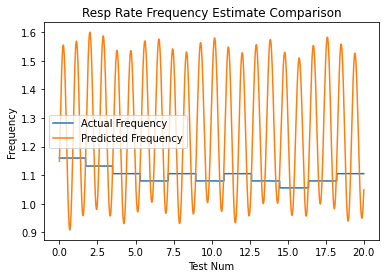

In [81]:
x = 0
Ts = 1/10000
numShow = 10000
t = arrays['t']
t = t[x:x+numShow]
plt.plot(t,y_test[0,x:x+numShow], t, fEst[0,x:x+numShow])
plt.ylabel('Frequency Estimate (Hz)')
plt.xlabel('Time (s)')
plt.legend(['Actual Frequency','Predicted Frequency'])
plt.title('Heart Rate Frequency Estimate')
plt.show()


In [65]:
print(y_test.shape)

(999, 25001)


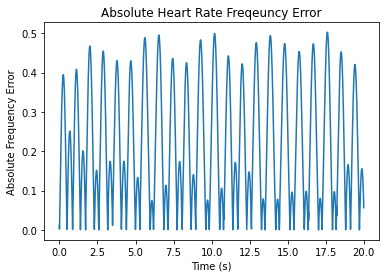

In [87]:
x = 0
Ts = 1/10000
numShow = 10000
t = arrays['t']
t = t[x:x+numShow]
plt.plot(t,np.abs(y_test[0,x:x+numShow] - fEst[0,x:x+numShow]))
plt.ylabel('Absolute Frequency Error (Hz)')
plt.xlabel('Time (s)')
plt.title('Absolute Heart Rate Freqeuncy Error')
plt.show()

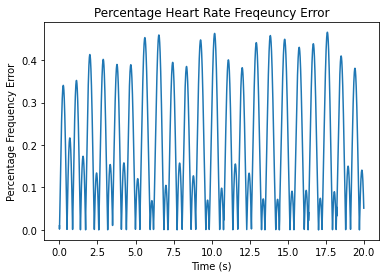

In [86]:
x = 0
Ts = 1/10000
numShow = 10000
t = arrays['t']
t = t[x:x+numShow]
plt.plot(t,np.abs(y_test[0,x:x+numShow] -fEst[0,x:x+numShow])/y_test[0,x:x+numShow])
plt.ylabel('Percentage Frequency Error')
plt.xlabel('Time (s)')
plt.title('Percentage Heart Rate Freqeuncy Error')
plt.show()